In [72]:
import os
import numpy as np
import pandas as pd

## Loading the data from directory, subdirectory and files

In [150]:
X = list()
Y = list()
for r,d,f in os.walk(r'''20_newsgroups'''):
    for file in f:
        X.append(os.path.join(r,file))
print(len(X))


for r,d,f in os.walk(r'''20_newsgroups'''):
    for dirc in d:
        Y.append(os.path.join(r,dirc))
print(len(Y))

19998
20


## Test Train Split

In [151]:
test_file = list()
train_file = X
for i in range(0,len(train_file),50):
    test_file.append(train_file[i])
for j in test_file:
    train_file.remove(j)

In [154]:
test_file.pop(0)
print(len(test_file))
len(train_file)

399


19598

'20_newsgroups/.DS_Store'

## Creating a list of complete stop words

In [155]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [156]:
len(stopwords)

179

In [157]:
stopwords_i = [word.title() for word in stopwords]
stopwords_u = [word.upper() for word in stopwords]
others = [str(i) for i in range(101)] + [str(i)+"." for i in range(101)]
sp = ["''",'""',"'",'"','!','~','`','!','@','#','$','%','^','&','*','/','-','+','_',':)','**','***','_/',
      '----------------------------------------------------------------------',
      '[]','{}','()','\\','|','[',']','(','|>','>>','<<',
')','{','}',',','.','?','=','<=','>=','<','>',':',';','A','B','Q','W','E','R','T','Y','U','I','O','P','S','D','F',
      'G','H','J','K','L','Z','X','C','V','N','M','A.','B.','Q.','W.','E.','R.','T.','Y.','U.','I.','O.','P.',
      'S.','D.','F.','G.','H.','J.','K.','L.','Z.','X.','C.','V.','N.','M.']
stopwords = stopwords + stopwords_i + stopwords_u + others + sp
len(stopwords)

839

## Building the Vocabulary

In [79]:
from nltk.tokenize import TweetTokenizer

In [80]:
tknz = TweetTokenizer()

In [81]:
vocab = {}
for k in train_file:
    #with open(k, 'rb') as f:
    #    text = f.read()
        text = tknz.tokenize(open(k,errors = "replace").read())
    #with open(k, encoding="utf8", errors='ignore') as f:
        #text = f.read()
        for t in text:
            if t not in stopwords:
                if vocab.get(t) != None:
                    vocab[t] += 1
                else:
                    vocab[t] = 1
    

In [82]:
print(len(vocab.keys()))

281630


In [83]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

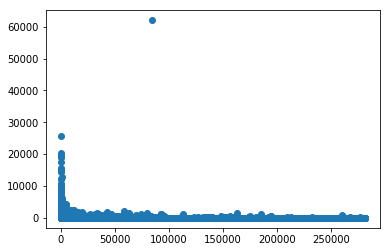

In [84]:
x_axis = list(range(len(vocab.keys())))
y_axis = list(vocab.values()) 
plt.scatter(x_axis,y_axis)
#plt.axis([0,350000,0,50000])
plt.show

## sorting the vocab list in descending order on the basis of values

In [85]:
voc = vocab
voc = sorted(voc.items(), key=lambda x: x[1], reverse=True) #Sorting the words according to their frequencies in the dataset
col = voc[0:2000] #Choosing top 2000 most occuring words
col = dict(col) 
columns = list(col.keys()) #list of all 2000 words

## creating a np array with total no. of training files as rows and total no. of vocab selected as columns

In [86]:
x_train = np.array([[0] * len(col) for i in range(len(train_file))])

In [87]:
x_train.shape

(19598, 2000)

## Traversing through each file again and checking each word if it is in vocab then incrementing its frequency

In [88]:
for k in range(len(train_file)):
    text = tknz.tokenize(open(train_file[k],errors = 'replace').read())
    for t in text:
        if t in columns:
            pos = columns.index(t)
            x_train[k][pos] += 1

In [158]:
x_train.shape

(19598, 2000)

In [90]:
df_train = pd.DataFrame(x_train,columns = columns)
y_train = list()

In [91]:
for i in train_file:
    clas = i.split('/')[1]
    y_train.append(clas)

In [92]:
y_train = np.array(y_train)

In [93]:
y_train.shape

(19598,)

## Creating array for x_test and y_test as well

In [159]:
x_test = np.array([[0] * len(col) for i in range(len(test_file))])

In [160]:
for k in range(len(test_file)):
    text = tknz.tokenize(open(test_file[k],errors = 'replace').read())
    for t in text:
        if t in columns:
            pos = columns.index(t)
            x_test[k][pos] += 1

In [161]:
x_test.shape

(399, 2000)

In [162]:
df_test = pd.DataFrame(x_test, columns = columns)
y_test = list()

In [163]:
for i in test_file:
    clas = i.split('/')[1]
    y_test.append(clas)

In [164]:
y_test = np.array(y_test)

In [165]:
y_test.shape

(399,)

In [166]:
from sklearn.naive_bayes import MultinomialNB

In [167]:
clf = MultinomialNB()

In [168]:
clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [169]:
y_pred_sklearn = clf.predict(x_test)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix

In [171]:
print(classification_report(y_test, y_pred_sklearn))
print(confusion_matrix(y_test, y_pred_sklearn))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.75      0.73        20
           comp.graphics       0.62      0.80      0.70        20
 comp.os.ms-windows.misc       0.00      0.00      0.00        20
comp.sys.ibm.pc.hardware       0.57      0.85      0.68        20
   comp.sys.mac.hardware       0.90      0.95      0.93        20
          comp.windows.x       0.88      0.75      0.81        20
            misc.forsale       0.77      1.00      0.87        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.86      0.95      0.90        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       1.00      0.95      0.97        20
               sci.crypt       0.95      0.95      0.95        20
         sci.electronics       0.90      0.95      0.93        20
                 sci.med       0.95      0.95      0.95        20
         

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
'''#  Making a dictionary of groups to give them an integer value which shows class
#  I have classified 20 groups into 6 classes viz, Religion, Computer, Vehicles, Sports, Politics and for_sale
dic = {'alt.atheism':1,
 'comp.graphics':2,
 'comp.os.ms-windows.misc':2,
 'comp.sys.ibm.pc.hardware':2,
 'comp.sys.mac.hardware':2,
 'comp.windows.x':2,
 'misc.forsale':3,
 'rec.autos':4,
 'rec.motorcycles':4,
 'rec.sport.baseball':4,
 'rec.sport.hockey':4,
 'sci.crypt':5,
 'sci.electronics':5,
 'sci.med':5,
 'sci.space':5,
 'soc.religion.christian':1,
 'talk.politics.guns':6,
 'talk.politics.mideast':6,
 'talk.politics.misc':6,
 'talk.religion.misc':1,
 '.DS_Store':3
      }
      '''

In [108]:
'''
y_train_six = list()
y_test_six = list()
#test_file.pop(0)
for group in train_file:
    g = group.split('/')[1]
    y_train_six.append(dic[g])
                    
for gr in test_file:
    g1 = gr.split('/')[1]
    
    
    y_test_six.append(dic[g1])
'''

In [109]:
'''clf.fit(x_train,y_train_six)
y_pred_sklearn_six = clf.predict(x_test)
print(classification_report(y_test_six, y_pred_sklearn_six))
print(confusion_matrix(y_test_six, y_pred_sklearn_six))

             precision    recall  f1-score   support

          1       0.91      0.90      0.91        59
          2       0.99      0.70      0.82       100
          3       0.50      0.95      0.66        21
          4       0.93      0.97      0.95        80
          5       0.86      0.96      0.91        80
          6       0.89      0.85      0.87        60

avg / total       0.90      0.87      0.87       400

[[53  0  0  0  0  6]
 [ 1 70 15  3 11  0]
 [ 0  1 20  0  0  0]
 [ 0  0  2 78  0  0]
 [ 1  0  1  1 77  0]
 [ 3  0  2  2  2 51]]


In [111]:
## from scratch

In [172]:
def fit(x_train, y_train):
    dic = {}
    possible_classes = set(y_train)
    num_features = x_train.shape[1]
    for current_class in possible_classes:
        dic[current_class] = {}
        current_class_rows = (y_train == current_class)
        x_train_current = x_train[current_class_rows]
        y_train_current = y_train[current_class_rows]
        dic["total_data"] = len(y_train)
        output = 0
        dic[current_class]["y_total_count"] = len(y_train_current)
        for j in range(1, num_features+1):
            dic[current_class][j] = x_train_current[:,j-1].sum()
            output += dic[current_class][j]
        dic[current_class]["total_count"] = output
         
    return dic        
    

In [173]:
def probability(dictionary,x,current_class):
    op = np.log(dictionary[current_class]["y_total_count"]) - np.log(dictionary["total_data"])
    num_features = len(dictionary[current_class].keys()) - 2
    for j in range(1,num_features + 1):
        if x[j-1] != 0:
            count_current_class_current_word = dictionary[current_class][j] + 1
            count_current_class = dictionary[current_class]["total_count"] + num_features
            current_probability = np.log(count_current_class_current_word) - np.log(count_current_class)
            op = op + current_probability
    return op

In [174]:
def predict_single_class(dictionary, x):
    all_classes = dictionary.keys()
    best_prob = -1000
    best_class = ""
    for current_class in all_classes:
        if current_class == "total_data":
            continue
        current_class_prob = probability(dictionary,x,current_class)
        if current_class_prob > best_prob:
            best_prob = current_class_prob
            best_class = current_class
    return best_class

In [175]:
def predict(dictionary, x_test):
    y_pred = list()
    for x in x_test:
        final_class = predict_single_class(dictionary,x)
        y_pred.append(final_class)
    return y_pred

In [176]:
dic = fit(x_train,y_train)

In [177]:
y_pred_own_algo = predict(dic,x_test) 

In [178]:
print(classification_report(y_test,y_pred_own_algo))
print(confusion_matrix(y_test,y_pred_own_algo))

                          precision    recall  f1-score   support

                               0.00      0.00      0.00         0
             alt.atheism       0.74      0.70      0.72        20
           comp.graphics       0.56      0.75      0.64        20
 comp.os.ms-windows.misc       0.00      0.00      0.00        20
comp.sys.ibm.pc.hardware       0.60      0.75      0.67        20
   comp.sys.mac.hardware       0.82      0.90      0.86        20
          comp.windows.x       0.88      0.75      0.81        20
            misc.forsale       0.76      0.95      0.84        20
               rec.autos       1.00      1.00      1.00        20
         rec.motorcycles       0.87      1.00      0.93        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       1.00      0.95      0.97        20
               sci.crypt       0.94      0.80      0.86        20
         sci.electronics       0.78      0.90      0.84        20
         

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
